# Details
<b>Model:</b> LSTM RNN Approach <br>
<b>Dataset:</b> BTC 2015-2021 Daily Price <br>
<b>Accuracy:</b> 

# Import dependencies

In [1]:
# Change Keras backend
from keras import backend as K
import os
os.environ['KERAS_BACKEND'] = "cntk"

In [18]:
# install dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Combine and explore dataset

In [3]:
df = pd.read_csv("../datasets/BTC/gemini_BTCUSD_day.csv")

In [4]:
df

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1.642390e+12,17/01/2022 04:00,BTCUSD,42655.12,42976.61,41559.11,42236.96,556.178715
1,1.642310e+12,16/01/2022 04:00,BTCUSD,43022.38,43499.99,42583.00,42655.12,622.078099
2,1.642220e+12,15/01/2022 04:00,BTCUSD,42947.72,43811.44,42590.52,43022.38,850.111677
3,1.642130e+12,14/01/2022 04:00,BTCUSD,42679.68,43462.53,41789.82,42947.72,800.802511
4,1.642050e+12,13/01/2022 04:00,BTCUSD,43525.85,44443.94,42326.63,42679.68,1120.790154
...,...,...,...,...,...,...,...,...
2289,1.444622e+09,12/10/2015 04:00,BTCUSD,248.98,248.98,245.75,245.75,71.047743
2290,1.444536e+09,11/10/2015 04:00,BTCUSD,246.30,249.50,245.96,248.98,22.747091
2291,1.444450e+09,10/10/2015 04:00,BTCUSD,245.51,246.30,244.60,246.30,30.870549
2292,1.444363e+09,09/10/2015 04:00,BTCUSD,243.60,249.97,243.60,245.51,61.587068


In [5]:
df.rename({"Unix Timestamp": "Timestamp"}, axis=1, inplace=True)

In [6]:
df.set_index('Timestamp', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2294 entries, 1642390000000.0 to 1444276800.0
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2294 non-null   object 
 1   Symbol  2294 non-null   object 
 2   Open    2294 non-null   float64
 3   High    2294 non-null   float64
 4   Low     2294 non-null   float64
 5   Close   2294 non-null   float64
 6   Volume  2294 non-null   float64
dtypes: float64(5), object(2)
memory usage: 143.4+ KB


In [7]:
df.sort_index(inplace=True)

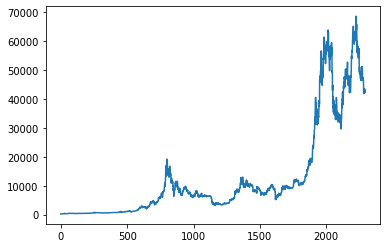

In [8]:
data_close = df['Close']
data_close = data_close.values.reshape(len(data_close), 1)
plt.plot(data_close)
plt.show()

In [9]:
len(data_close)

2294